# 数据加载与采样

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/tutorials/zh_cn/dataset/mindspore_sampler.ipynb)&emsp;
[![下载样例代码](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/tutorials/zh_cn/dataset/mindspore_sampler.py)&emsp;
[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source.svg)](https://gitee.com/mindspore/docs/blob/master/tutorials/source_zh_cn/dataset/sampler.ipynb)

## 数据加载

数据是训练的基础，`mindspore.dataset` 模块提供了自定义方式加载数据集的API，也提供了常用的公开数据集的加载类。

### 自定义数据集

MindSpore可以构造自定义数据加载类或自定义数据集生成函数的方式来生成数据集，然后通过[mindspore.dataset.GeneratorDataset](https://www.mindspore.cn/docs/zh-CN/master/api_python/dataset/mindspore.dataset.GeneratorDataset.html)接口实现自定义方式的数据集加载。

`GeneratorDataset` 支持通过可随机访问数据集对象、可迭代数据集对象和生成器(generator)构造自定义数据集，下面分别对其进行介绍。

#### 可随机访问数据集

可随机访问数据集是实现了 `__getitem__` 和 `__len__` 方法的数据集，表示可以通过索引/键直接访问对应位置的数据样本。

例如，当使用 `dataset[idx]` 访问这样的数据集时，可以读取dataset内容中第 `idx` 个样本或标签。

In [1]:
import numpy as np
from mindspore.dataset import GeneratorDataset

# Random-accessible object as input source
class RandomAccessDataset:
    def __init__(self):
        self._data = np.ones((5, 2))
        self._label = np.zeros((5, 1))
    def __getitem__(self, index):
        return self._data[index], self._label[index]
    def __len__(self):
        return len(self._data)

loader = RandomAccessDataset()
dataset = GeneratorDataset(source=loader, column_names=["data", "label"])

for data in dataset:
    print(data)

[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 0.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 0.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 0.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 0.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 0.00000000e+00])]


#### 可迭代数据集

可迭代的数据集是实现了 `__iter__` 和 `__next__` 方法的数据集，表示可以通过迭代的方式逐步获取数据样本。这种类型的数据集特别适用于随机访问成本太高或者不可行的情况。

例如，当使用iter(dataset)的形式访问数据集时，可以读取从数据库、远程服务器返回的数据流。

下面构造一个简单迭代器，并将其加载至 `GeneratorDataset` 。

In [2]:
# Iterator as input source
class IterableDataset():
    def __init__(self, start, end):
        '''init the class object to hold the data'''
        self.start = start
        self.end = end
    def __next__(self):
        '''iter one data and return'''
        return next(self.data)
    def __iter__(self):
        '''reset the iter'''
        self.data = iter(range(self.start, self.end))
        return self

loader = IterableDataset(1, 5)
dataset = GeneratorDataset(source=loader, column_names=["data"])

for d in dataset:
    print(d)

[Tensor(shape=[], dtype=Int64, value= 1)]
[Tensor(shape=[], dtype=Int64, value= 2)]
[Tensor(shape=[], dtype=Int64, value= 3)]
[Tensor(shape=[], dtype=Int64, value= 4)]


#### 生成器

生成器也属于可迭代的数据集类型，其直接依赖Python的生成器类型 `generator` 返回数据，直至生成器抛出 `StopIteration` 异常。

下面构造一个生成器，并将其加载至 `GeneratorDataset` 。

In [3]:
# Generator
def my_generator(start, end):
    for i in range(start, end):
        yield i

# since a generator instance can be only iterated once, we need to wrap it by lambda to generate multiple instances
dataset = GeneratorDataset(source=lambda: my_generator(3, 6), column_names=["data"])

for d in dataset:
    print(d)

[Tensor(shape=[], dtype=Int64, value= 3)]
[Tensor(shape=[], dtype=Int64, value= 4)]
[Tensor(shape=[], dtype=Int64, value= 5)]


### 常用的公开数据集的加载

MindSpore也支持开源经典数据集的解析读取，如MNIST、CIFAR-10、CLUE、LJSpeech等。

以MNIST数据集作为样例，更多其他数据集请参考 [开源数据集](https://www.mindspore.cn/docs/zh-CN/master/api_python/mindspore.dataset.loading.html#%E5%BC%80%E6%BA%90%E6%95%B0%E6%8D%AE%E9%9B%86%E5%8A%A0%E8%BD%BD) 。


file_sizes: 100%|██████████████████████████| 10.8M/10.8M [00:01<00:00, 7.65MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./
<class 'mindspore.dataset.engine.datasets_vision.MnistDataset'>


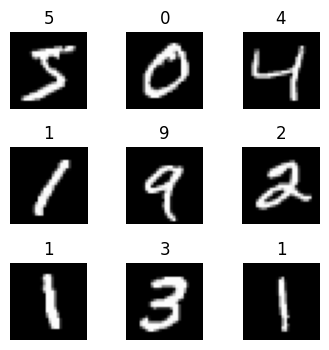

In [4]:
# Download data from open datasets
from download import download
from mindspore.dataset import MnistDataset
import matplotlib.pyplot as plt

url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/" \
      "notebook/datasets/MNIST_Data.zip"
path = download(url, "./", kind="zip", replace=True)

# create MNIST loader
train_dataset = MnistDataset("MNIST_Data/train", shuffle=False)
print(type(train_dataset))

# visialize dataset content
figure = plt.figure(figsize=(4, 4))
cols, rows = 3, 3

plt.subplots_adjust(wspace=0.5, hspace=0.5)

for idx, (image, label) in enumerate(train_dataset.create_tuple_iterator()):
    figure.add_subplot(rows, cols, idx + 1)
    plt.title(int(label))
    plt.axis("off")
    plt.imshow(image.asnumpy().squeeze(), cmap="gray")
    if idx == cols * rows - 1:
        break
plt.show()

## 采样器

为满足训练需求，解决诸如数据集过大或样本类别分布不均等问题，MindSpore提供了多种不同用途的采样器（Sampler），帮助用户对数据集进行不同形式的采样。用户只需在加载数据集时传入采样器对象，即可实现数据的采样。

MindSpore目前提供了如[mindspore.dataset.RandomSampler](https://www.mindspore.cn/docs/zh-CN/master/api_python/dataset/mindspore.dataset.RandomSampler.html)、[mindspore.dataset.WeightedRandomSampler](https://www.mindspore.cn/docs/zh-CN/master/api_python/dataset/mindspore.dataset.WeightedRandomSampler.html)、[mindspore.dataset.SubsetRandomSampler](https://www.mindspore.cn/docs/zh-CN/master/api_python/dataset/mindspore.dataset.SubsetRandomSampler.html)等多种采样器。此外，用户也可以根据需要实现自定义的采样器类。

> 更多采样器的使用方法参见[采样器API文档](https://www.mindspore.cn/docs/zh-CN/master/api_python/mindspore.dataset.loading.html#%E9%87%87%E6%A0%B7%E5%99%A8-1)。

下面主要以CIFAR-10数据集为例，介绍几种常用MindSpore采样器的使用方法。

![cifar10](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/tutorials/source_zh_cn/dataset/images/cifar10.jpg)

> 本章节中的示例代码依赖`matplotlib`，可使用命令`pip install matplotlib`安装。如本文档以Notebook运行时，完成安装后需要重启kernel才能执行后续代码。

In [5]:
from download import download

url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/cifar-10-binary.tar.gz"

path = download(url, "./", kind="tar.gz", replace=True)


file_sizes: 100%|████████████████████████████| 170M/170M [00:21<00:00, 7.85MB/s]
Extracting tar.gz file...
Successfully downloaded / unzipped to ./


解压后数据集文件的目录结构如下：

```text
.
└── cifar-10-batches-bin
    ├── batches.meta.txt
    ├── data_batch_1.bin
    ├── data_batch_2.bin
    ├── data_batch_3.bin
    ├── data_batch_4.bin
    ├── data_batch_5.bin
    ├── readme.html
    └── test_batch.bin
```

### RandomSampler

从索引序列中随机采样指定数目的数据。

下面的样例使用随机采样器，分别从数据集中有放回和无放回地随机采样5个数据，并打印展示。为了便于观察有放回与无放回的效果，这里自定义了一个数据量较小的数据集。

In [6]:
from mindspore.dataset import RandomSampler, NumpySlicesDataset

np_data = [1, 2, 3, 4, 5, 6, 7, 8]  # 数据集

# 定义有放回采样器，采样5条数据
sampler1 = RandomSampler(replacement=True, num_samples=5)
dataset1 = NumpySlicesDataset(np_data, column_names=["data"], sampler=sampler1)

print("With Replacement:    ", end='')
for data in dataset1.create_tuple_iterator(output_numpy=True):
    print(data[0], end=' ')

# 定义无放回采样器，采样5条数据
sampler2 = RandomSampler(replacement=False, num_samples=5)
dataset2 = NumpySlicesDataset(np_data, column_names=["data"], sampler=sampler2)

print("\nWithout Replacement: ", end='')
for data in dataset2.create_tuple_iterator(output_numpy=True):
    print(data[0], end=' ')

With Replacement:    1 4 5 8 7 
Without Replacement: 1 6 7 4 3 

从上面的打印结果可以看出，使用有放回采样器时，同一条数据可能会被多次获取；使用无放回采样器时，同一条数据只能被获取一次。

### WeightedRandomSampler

指定长度为N的采样概率列表，按照概率在前N个样本中随机采样指定数目的数据。

下面的样例使用带权随机采样器从CIFAR-10数据集的前10个样本中按概率获取6个样本，并展示已读取数据的形状和标签。

Image shape: (32, 32, 3) , Label: 6
Image shape: (32, 32, 3) , Label: 6
Image shape: (32, 32, 3) , Label: 6
Image shape: (32, 32, 3) , Label: 9
Image shape: (32, 32, 3) , Label: 9
Image shape: (32, 32, 3) , Label: 6


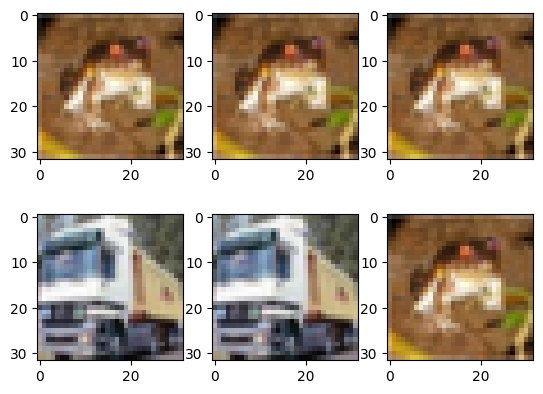

In [7]:
import math
import matplotlib.pyplot as plt
from mindspore.dataset import WeightedRandomSampler, Cifar10Dataset
%matplotlib inline

DATA_DIR = "./cifar-10-batches-bin/"

# 指定前10个样本的采样概率并进行采样
weights = [0.8, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
sampler = WeightedRandomSampler(weights, num_samples=6)
dataset = Cifar10Dataset(DATA_DIR, sampler=sampler)  # 加载数据

def plt_result(dataset, row):
    """显示采样结果"""
    num = 1
    for data in dataset.create_dict_iterator(output_numpy=True):
        print("Image shape:", data['image'].shape, ", Label:", data['label'])
        plt.subplot(row, math.ceil(dataset.get_dataset_size() / row), num)
        image = data['image']
        plt.imshow(image, interpolation="None")
        num += 1

plt_result(dataset, 2)

从上面的打印结果可以看出，本次在10个样本中随机采样了6条数据，只有前面两个采样概率不为0的样本才有机会被采样。

### SubsetRandomSampler

从指定样本索引子序列中随机采样指定数目的样本数据。

下面的样例使用子序列随机采样器从CIFAR-10数据集的指定子序列中抽样6个样本，并展示已读取数据的形状和标签。

Image shape: (32, 32, 3) , Label: 4
Image shape: (32, 32, 3) , Label: 1
Image shape: (32, 32, 3) , Label: 6
Image shape: (32, 32, 3) , Label: 9
Image shape: (32, 32, 3) , Label: 9
Image shape: (32, 32, 3) , Label: 1


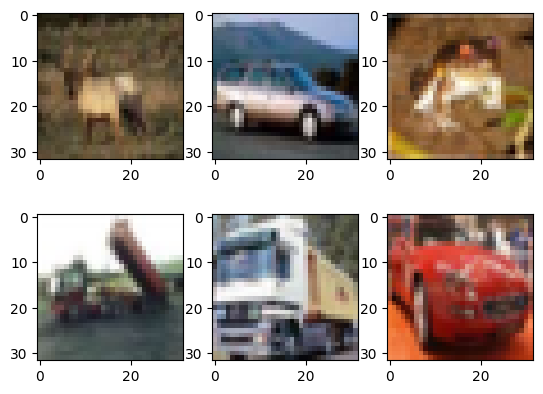

In [8]:
from mindspore.dataset import SubsetRandomSampler

# 指定样本索引序列
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sampler = SubsetRandomSampler(indices, num_samples=6)
# 加载数据
dataset = Cifar10Dataset(DATA_DIR, sampler=sampler)

plt_result(dataset, 2)

从上面的打印结果可以看到，采样器从索引序列中随机采样了6个样本。

### PKSampler

在指定的数据集类别P中，每种类别各采样K条数据。

下面的样例使用PK采样器从CIFAR-10数据集中每种类别抽样2个样本，最多10个样本，并展示已读取数据的形状和标签。

Image shape: (32, 32, 3) , Label: 0
Image shape: (32, 32, 3) , Label: 0
Image shape: (32, 32, 3) , Label: 1
Image shape: (32, 32, 3) , Label: 1
Image shape: (32, 32, 3) , Label: 2
Image shape: (32, 32, 3) , Label: 2
Image shape: (32, 32, 3) , Label: 3
Image shape: (32, 32, 3) , Label: 3
Image shape: (32, 32, 3) , Label: 4
Image shape: (32, 32, 3) , Label: 4


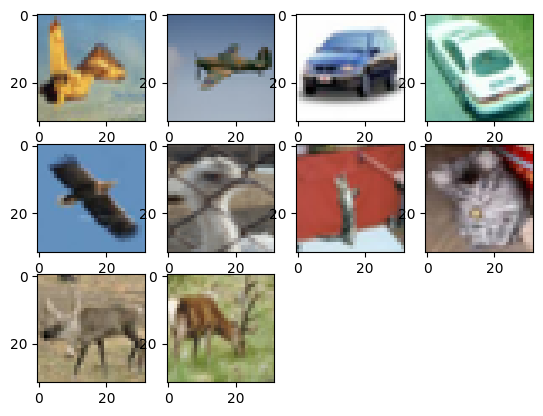

In [9]:
from mindspore.dataset import PKSampler

# 每种类别抽样2个样本，最多10个样本
sampler = PKSampler(num_val=2, class_column='label', num_samples=10)
dataset = Cifar10Dataset(DATA_DIR, sampler=sampler)

plt_result(dataset, 3)

从上面的打印结果可以看出，采样器对数据集中的每种标签都采样了2个样本，一共10个样本。

### DistributedSampler

在分布式训练中，对数据集分片进行采样。

下面的样例展示了一个有12个样本的数据集，并使用分布式采样器将数据集划分为4个分片，每个分片的采样规则如下：

| shard id |  sample id  |
| -------- | ----------- |
| shard 0  |  0, 4, 8    |
| shard 1  |  1, 5, 9    |
| shard 2  |  2, 6, 10   |
| shard 3  |  3, 7, 11   |

每个分片都具有3个样本，下面展示读取分片0中的包含的采样数据。

In [10]:
from mindspore.dataset import DistributedSampler

# 自定义数据集
data_source = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 构建的数据集分为4片，共采样3个数据样本
sampler = DistributedSampler(num_shards=4, shard_id=0, shuffle=False)
dataset = NumpySlicesDataset(data_source, column_names=["data"], sampler=sampler)

# 打印数据集
for data in dataset.create_dict_iterator():
    print(data)

{'data': Tensor(shape=[], dtype=Int64, value= 0)}
{'data': Tensor(shape=[], dtype=Int64, value= 4)}
{'data': Tensor(shape=[], dtype=Int64, value= 8)}


从上面的打印结果可以看出，数据集被分成了4片，每片有3个样本，本次获取的是id为0的片中的样本。

## 自定义采样器

用户可以自定义采样器，并把它应用到数据集上。

### \_\_iter\_\_ 模式

用户可以继承`Sampler`基类，通过实现`__iter__`方法来自定义采样器的采样方式。

下面的样例定义了一个从下标0至下标9间隔为2采样的采样器，将其作用于自定义数据集，并展示已读取数据。

In [11]:
import mindspore.dataset as ds

# 自定义采样器
class MySampler(ds.Sampler):
    def __iter__(self):
        for i in range(0, 10, 2):
            yield i

# 自定义数据集
np_data = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

# 加载数据
dataset = ds.NumpySlicesDataset(np_data, column_names=["data"], sampler=MySampler())
for data in dataset.create_tuple_iterator(output_numpy=True):
    print(data[0], end=' ')

a c e g i 

从上面的打印可以看出，自定义的采样器读取了下标为0、2、4、6、8的样本数据，这与自定义采样器的采样目的一致。

### \_\_getitem\_\_ 模式

用户可以定义一个采样器类，该类包含 `__init__` 、 `__getitem__` 和 `__len__` 方法。

下面的样例定义了一个下标为 `[3, 4, 3, 2, 0, 11, 5, 5, 5, 9, 1, 11, 11, 11, 11, 8]` 的采样器类，将其作用于自定义数据集，并展示已读取数据。

In [12]:
import mindspore.dataset as ds

# 自定义采样器
class MySampler():
    def __init__(self):
        self.index_ids = [3, 4, 3, 2, 0, 11, 5, 5, 5, 9, 1, 11, 11, 11, 11, 8]
    def __getitem__(self, index):
        return self.index_ids[index]
    def __len__(self):
        return len(self.index_ids)

# 自定义数据集
np_data = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

# 加载数据
dataset = ds.NumpySlicesDataset(np_data, column_names=["data"], sampler=MySampler())
for data in dataset.create_tuple_iterator(output_numpy=True):
    print(data[0], end=' ')

d e d c a l f f f j b l l l l i 

从上面的打印可以看出，自定义的采样器读取了下标为 `[3, 4, 3, 2, 0, 11, 5, 5, 5, 9, 1, 11, 11, 11, 11, 8]` 的样本数据，这与自定义采样器的采样目的一致。